In [ ]:
# for linux
#!apt-get install poppler-utils tesseract-ocr libmagic-dev

# for mac
# %brew install poppler tesseract libmagic

In [1]:
#%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
#%pip install -Uq chromadb tiktoken
#%pip install -Uq langchain langchain-community 
#%pip install -Uq python_dotenv

#%pip install -U langchain-ollama

In [1]:
from IPython.display import Markdown, display_pdf
from rich.markdown import Markdown as rich_Markdown

In [4]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM

In [5]:
template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

#model = OllamaLLM(model="deepseek-r1:8b")

model = OllamaLLM(model="llama3.2")


chain = prompt | model

chain.invoke({"question": "Que es langchain?"})

ConnectError: [Errno 111] Connection refused

In [2]:
import utils_rag

/home/notebook-user/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
import os

#os.environ["GROQ_API_KEY"] = "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"
os.environ["LANGCHAIN_API_KEY"] = "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"
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [6]:
chunks = utils_rag.ejecutar_chunking_pdf(dict_pdfs,ejecutar_pdf=ejecutar_pdf)

In [7]:
chunks

In [8]:
import utils_rag

tables, texts, images_b64 = utils_rag.data_general(chunks)

In [10]:
#utils_rag.display_base64_image(images_b64[0])

In [9]:
chunks[0].to_dict()['metadata']['filename']

'DeepSeek_R1.pdf'

In [10]:
ejemplo = [chunks[0],chunks[1]]
text_chunks, tables_html_chunks, images_b64_chunks = utils_rag.extract_text_with_page_mapping(ejemplo)

In [11]:
text_chunks

[{'text': 'DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via Reinforcement Learning\nDeepSeek-AI\nresearch@deepseek.com\nAbstract\nWe introduce our first-generation reasoning models, DeepSeek-R1-Zero and DeepSeek-R1. DeepSeek-R1-Zero, a model trained via large-scale reinforcement learning (RL) without super- vised fine-tuning (SFT) as a preliminary step, demonstrates remarkable reasoning capabilities. Through RL, DeepSeek-R1-Zero naturally emerges with numerous powerful and intriguing reasoning behaviors. However, it encounters challenges such as poor readability, and language mixing. To address these issues and further enhance reasoning performance, we introduce DeepSeek-R1, which incorporates multi-stage training and cold-start data before RL. DeepSeek- R1 achieves performance comparable to OpenAI-o1-1217 on reasoning tasks. To support the research community, we open-source DeepSeek-R1-Zero, DeepSeek-R1, and six dense models (1.5B, 7B, 8B, 14B, 32B, 70B) distilled from Deep

In [12]:
tables_html_chunks

[{'text_html': '<table><tbody><tr><td>.1</td><td>Contributions|</td><td></td><td>.</td><td>. .</td><td>. .</td><td>.</td><td>...</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td></tr><tr><td>2</td><td>?ummary</td><td>of</td><td></td><td></td><td></td><td>EvaluationResults|.</td><td></td><td></td><td>.</td><td>.</td><td>. .</td><td></td><td>...</td><td></td><td></td><td>...</td><td></td><td>..</td><td></td><td>.</td><td></td><td></td><td></td><td></td><td>oo</td><td></td><td></td></tr><tr><td></td><td>\\pproacE</td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td><td></td></tr><tr><td>T</td><td>OVEIVIEW].</td><td>«</td><td>o</td><td>o o</td><td>v e</td><td>e</td><td></td><td></td><

In [13]:
images_b64_chunks

[{'images_b64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABAAV0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iisXxN4hh8O6YZ3Ae4kysEf95vU+w7/AP16unTlUmoQV2xNqKuy5qesWGjwCa/uUhU/dB5ZvoBya468+KNsjFbLTpZR2aVwn6DNeeahqF1ql491eTNLM3c9h6Adh7VVr6nD5JRhG9b3n+BwzxMm/d0

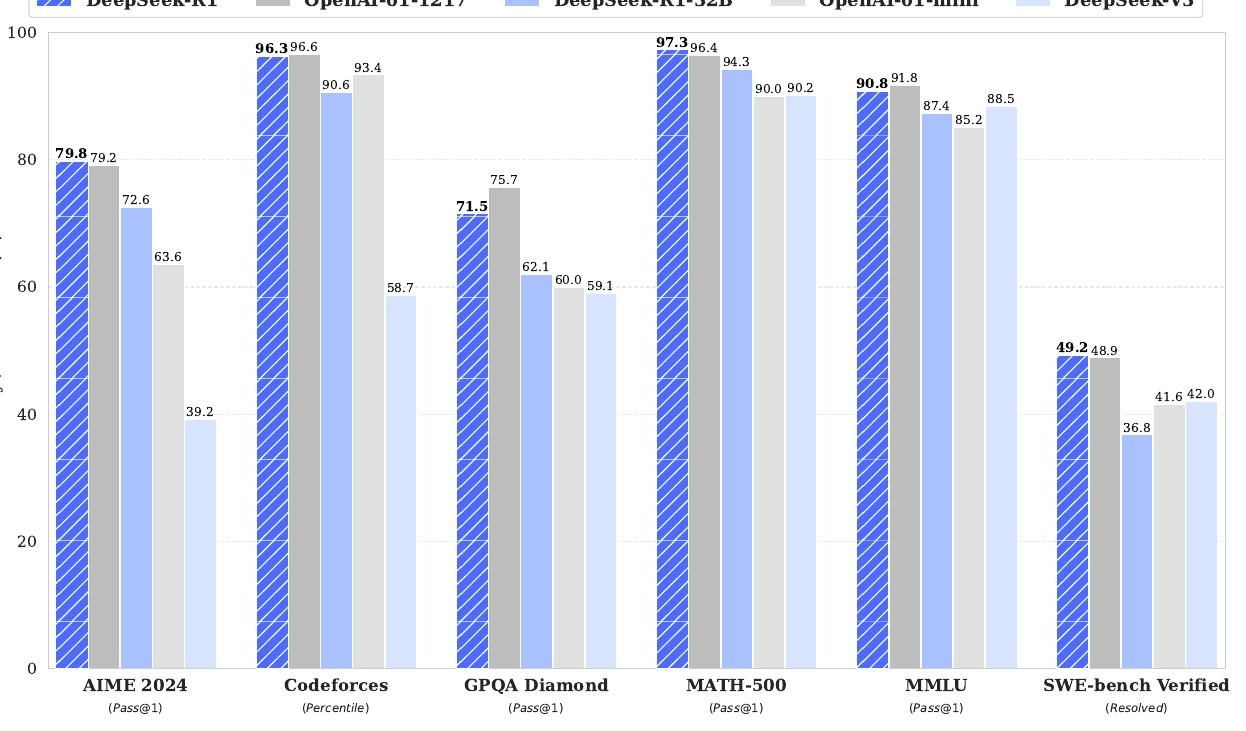

In [14]:
utils_rag.display_base64_image(images_b64_chunks[1]['images_b64'])

In [35]:

from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt_text = """
Eres un asistente cuya tarea es resumir tablas y texto.
Da un resumen conciso de la tabla o el texto.

Responde solo con el resumen, sin comentarios adicionales.
No comiences tu mensaje diciendo "Aquí hay un resumen" ni nada por el estilo.
Solo da el resumen tal como está.

Fragmento de tabla o texto: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatGroq(temperature=0.2, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()


In [42]:
def summarize_text_chunks(text_chunks,text):
    """
    Aplica la cadena de resumen a cada fragmento de texto.
    
    Args:
        text_chunks (List[Dict]): Lista de diccionarios con 'text' y 'page_number'.
    
    Returns:
        List[Dict]: Lista de diccionarios con 'summary' y 'page_number'.
    """
    summarized_chunks = []
    
    for chunk in text_chunks:
        texto = chunk[text]
        paginas = chunk['page_number']
        
        # Crear el contexto para el prompt, incluyendo las páginas
        prompt_input = f"{texto}"
        
        # Aplicar la cadena de resumen
        resumen = summarize_chain.invoke(prompt_input)
        
        summarized_chunks.append({
            'summary': resumen,
            'page_number': paginas
        })
    
    return summarized_chunks

# Aplicar la función de resumen
summaries = summarize_text_chunks(text_chunks,'text')

In [ ]:
summaries

In [45]:
summaries_tables = summarize_text_chunks(tables_html_chunks,'text_html')

In [ ]:
summaries_tables

In [ ]:
utils_rag.display_chunk_pages(chunks[7],file_path)

In [ ]:
display(rich_Markdown(text_chunk)) 

In [ ]:
utils_rag.display_chunk_pages(chunks[8],file_path)

In [91]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [92]:

from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt_text = """
Eres un asistente cuya tarea es resumir tablas y texto.
Da un resumen conciso de la tabla o el texto.

Responde solo con el resumen, sin comentarios adicionales.
No comiences tu mensaje diciendo "Aquí hay un resumen" ni nada por el estilo.
Solo da el resumen tal como está.

Fragmento de tabla o texto: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()
summarize_chain_2 = prompt | model | StrOutputParser()

In [93]:
table_summaries = summarize_chain.batch(tables_html_chunk, {"max_concurrency": 3})

In [ ]:
table_summaries

In [ ]:

display(rich_Markdown(table_summaries[0]))

In [96]:
resumen = summarize_chain_2.invoke(text_chunk)

In [ ]:
display(rich_Markdown(resumen))

In [ ]:
from IPython.display import Markdown, display_pdf
from rich.markdown import Markdown as rich_Markdown

display(rich_Markdown(texts_1[0].to_dict()['text'])) 

In [ ]:
texts_1[1].metadata.orig_elements[1].to_dict() 

In [ ]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

In [ ]:
import os
from typing import List, Dict, Any



# Borrar

In [17]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))


def data_general(chunks):
    # separate tables from texts
    tables = []
    texts = []
    images_b64 = []
    for chunk in chunks:
        if "Table" in str(type(chunk)):
            tables.append(chunk)

        if "CompositeElement" in str(type((chunk))):
            texts.append(chunk)
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    
    return tables, texts, images_b64



In [15]:
tables, texts, images_b64 = data_general(chunks)

In [ ]:
display_base64_image(images_b64[0])

In [5]:
import json


#output_path = "/workspaces/RAG_LangChain/data/chunks_docs"
output_file = "/workspaces/RAG_LangChain/data/chunks_docs/chunks_golondrinas.json"



# Función para serializar los objetos de metadatos que no son serializables por defecto
def metadata_serializer(obj):
    if hasattr(obj, 'to_dict'):
        return obj.to_dict()
    raise TypeError(f"Object of type {obj.__class__.__name__} is not JSON serializable")

# Preparar los datos para el archivo JSON
data_to_save = []
for chunk in chunks:
    chunk_data = {
        "type": chunk.__class__.__name__,
        "text": chunk.text,
        "metadata": chunk.metadata.to_dict(),
    }
    data_to_save.append(chunk_data)

# Guardar los datos en un archivo JSON
output_file = "/workspaces/RAG_LangChain/data/chunks_docs/chunks_golondrinas.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(data_to_save, f, ensure_ascii=False, indent=4, default=metadata_serializer)


In [11]:
from unstructured.staging.base import dict_to_elements, elements_to_json

json_data = elements_to_json(chunks)

    

In [13]:
output_file_2 = "/workspaces/RAG_LangChain/data/chunks_docs/chunks_golondrinas_v2.json"
with open(output_file_2, 'w', encoding='utf-8') as f:
    f.write(json_data)

In [8]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [ ]:
chunks

In [ ]:
chunks[0]

In [ ]:
chunks[0].metadata.orig_elements

In [9]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

#display_base64_image(images[10])

In [25]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

def plot_pdf_with_boxes(pdf_page, segments) :
  pix = pdf_page.get_pixmap()
  pil_image = Image.frombytes ("RGB", [pix.width, pix.height], pix.samples)
  fig, ax = plt.subplots(1, figsize=(10, 10))
  ax. imshow (pil_image)
  categories = set()
  category_to_color = {
      'Title': 'blue',
      'Image': 'green',
      'Table': 'red',
  }
  for segment in segments:
    points = segment ["coordinates"] ["points"]
    layout_width = segment ["coordinates"] ["layout_width"]
    layout_height = segment ["coordinates" ] ["layout_height"]
    scaled_points = [
        (x * pix.width / layout_width, y * pix.height / layout_height)
        for x, y in points
        ]
    box_color = category_to_color.get(segment["category"], "deepskyblue")
    categories.add(segment["category"])
    rect = patches.Polygon(scaled_points, linewidth=1, edgecolor=box_color, facecolor="none")
    ax.add_patch(rect)

  # Make legend
  legend_handles = [patches.Patch(color="deepskyblue", label="Text" )]
  for category in ["Title", "Image", "Table"]:
    if category in categories:
      legend_handles.append(
          patches.Patch(color=category_to_color[category], label=category)
      )
  ax.axis("off")
  ax.legend(handles=legend_handles, loc="upper right")
  plt.tight_layout()
  plt.show()

def render_page(doc_list: list, page_number: int, print_text=True) -> None:

  pdf_page = fitz.open (file_path). load_page (page_number - 1)
  page_docs = [
      doc for doc in doc_list if doc.metadata.get ("page_number") == page_number
  ]
  segments = [doc.metadata for doc in page_docs]
  plot_pdf_with_boxes(pdf_page, segments)
  if print_text:
    for doc in page_docs:
      print(f"{doc. page_content}\n" )

In [ ]:
for i, chunk in enumerate(chunks):

  if "CompositeElement" in str(type(chunk)):
    print("\n\nChunk", i)
    for doc in chunk.metadata.orig_elements:
      print(doc.to_dict()["type"], doc.metadata.page_number)

In [ ]:
chunks[1].metadata.orig_elements[0].to_dict()

In [28]:
from langchain_core.documents import Document

def extract_page_numbers_from_chunks(chunk):
  
  elements = chunk.metadata.orig_elements
  page_numbers = set()

  for element in elements:
    page_numbers.add(element.metadata.page_number)
  
  return page_numbers

def display_chunk_pages(chunk):
  
  
  page_numbers = extract_page_numbers_from_chunks(chunk)
  
  docs = []

  for element in chunk.metadata.orig_elements:
    metadata = element.metadata.to_dict()
    if "Table" in str(type(element)):
      metadata["category"] = "Table"
    elif "Image" in str(type(element)):
      metadata["category"] = "Image"
    else:
      metadata["category"] = "Text"

    metadata["page_number"] = element.metadata.page_number

    docs.append(Document(page_content=element.text, metadata=metadata))

  for page_number in page_numbers:
    render_page(docs, page_number, False)


In [ ]:
display_chunk_pages(chunks[29])

In [ ]:
len(chunks)